# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


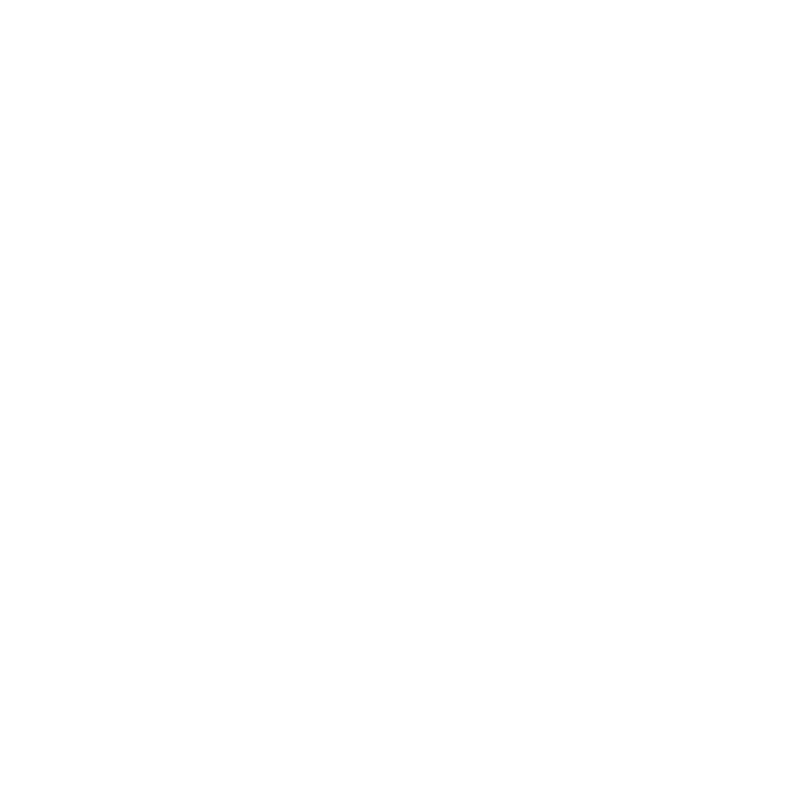

In [231]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [232]:
# OBJECTIVES:
# Represent record highs and record lows from 2005-2014 through line graphs, for each month.
# Omit 29th Feb dates for the sake of simplicity
# On the same graph, display record highs and record lows in 2015 which break the top and bottom limits that were established
# from 2005-2014
# Shade area between the 2 line graphs
# Label everything, include a legend.
# Remove junk, improve data:ink ratio, make graphic insightful, pleasant, enlightening, truthful, useful, etc. 



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mplleaflet
import matplotlib.dates as dates

%matplotlib notebook

df2 = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df2.head()

##For reference:

    #id : station identification code
    #date : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
    #element : indicator of element type
     #   TMAX : Maximum temperature (tenths of degrees C)
    #    TMIN : Minimum temperature (tenths of degrees C)
    #value : data value for element (tenths of degrees C)


,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [233]:
#Temperature needs to be reduced to degrees Celsius. Right now it is in tenths of degrees C.

df2['Data_Value'] = df2['Data_Value']/10

df2.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [234]:
# It would seem the ID won't be used, should be fine to drop it.

df2.drop('ID', axis = 1, inplace = True)

df2.head()

,Date,Element,Data_Value
0,2014-11-12,TMAX,2.2
1,2009-04-29,TMIN,5.6
2,2008-05-26,TMAX,27.8
3,2005-11-11,TMAX,13.9
4,2014-02-27,TMAX,-10.6


In [235]:
# Converting current expression of date into datetime for easier manipulation and info acquisition

df2['Date'] = pd.to_datetime(df2['Date'])

df2.head()

,Date,Element,Data_Value
0,2014-11-12,TMAX,2.2
1,2009-04-29,TMIN,5.6
2,2008-05-26,TMAX,27.8
3,2005-11-11,TMAX,13.9
4,2014-02-27,TMAX,-10.6


In [236]:
# Adding Year and Month

# February 29th is to be omitted for the sake of simplicity.

df2['Year'] = df2['Date'].dt.year

print(df2.head())
print(len(df2))


        Date Element  Data_Value  Year
0 2014-11-12    TMAX         2.2  2014
1 2009-04-29    TMIN         5.6  2009
2 2008-05-26    TMAX        27.8  2008
3 2005-11-11    TMAX        13.9  2005
4 2014-02-27    TMAX       -10.6  2014
165085


In [237]:
# Acquiring an expression for month and day, for easy omission of Feb 29th

df2['Month_and_Day'] = df2['Date'].dt.strftime('%m-%d')

df2 = df2[df2['Month_and_Day'] != '02-29']

print(df2.head())
print(len(df2))

        Date Element  Data_Value  Year Month_and_Day
0 2014-11-12    TMAX         2.2  2014         11-12
1 2009-04-29    TMIN         5.6  2009         04-29
2 2008-05-26    TMAX        27.8  2008         05-26
3 2005-11-11    TMAX        13.9  2005         11-11
4 2014-02-27    TMAX       -10.6  2014         02-27
165002


In [238]:
# Reduction in length of df2 from 165085 to 165002 suggests that Feb 29 dates were successfully removed.

# With data in view, we may now attempt to go about looking for the record highs and lows necessary.

record_highs = df2[(df2.Element == 'TMAX') & (df2.Year >= 2005)& (df2.Year <= 2014)]

record_highs = record_highs.groupby(['Month_and_Day'])['Data_Value'].max()
                    
print(record_highs.head())



record_lows = df2[(df2.Element == 'TMIN') & (df2.Year >= 2005)& (df2.Year <= 2014)]

record_lows = record_lows.groupby(['Month_and_Day'])['Data_Value'].min()

print(record_lows.head())

Month_and_Day
01-01    15.6
01-02    13.9
01-03    13.3
01-04    10.6
01-05    12.8
Name: Data_Value, dtype: float64
Month_and_Day
01-01   -16.0
01-02   -26.7
01-03   -26.7
01-04   -26.1
01-05   -15.0
Name: Data_Value, dtype: float64


In [239]:
# For 2015 dates, a date-time index should be made too


df2.sort_values('Date', ascending = False, inplace = True)

df2.head()

# last date is 2015-12-31, so range needs to up to 1st Jan 2016

import numpy as np

dt_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')



<IPython.core.display.Javascript object>


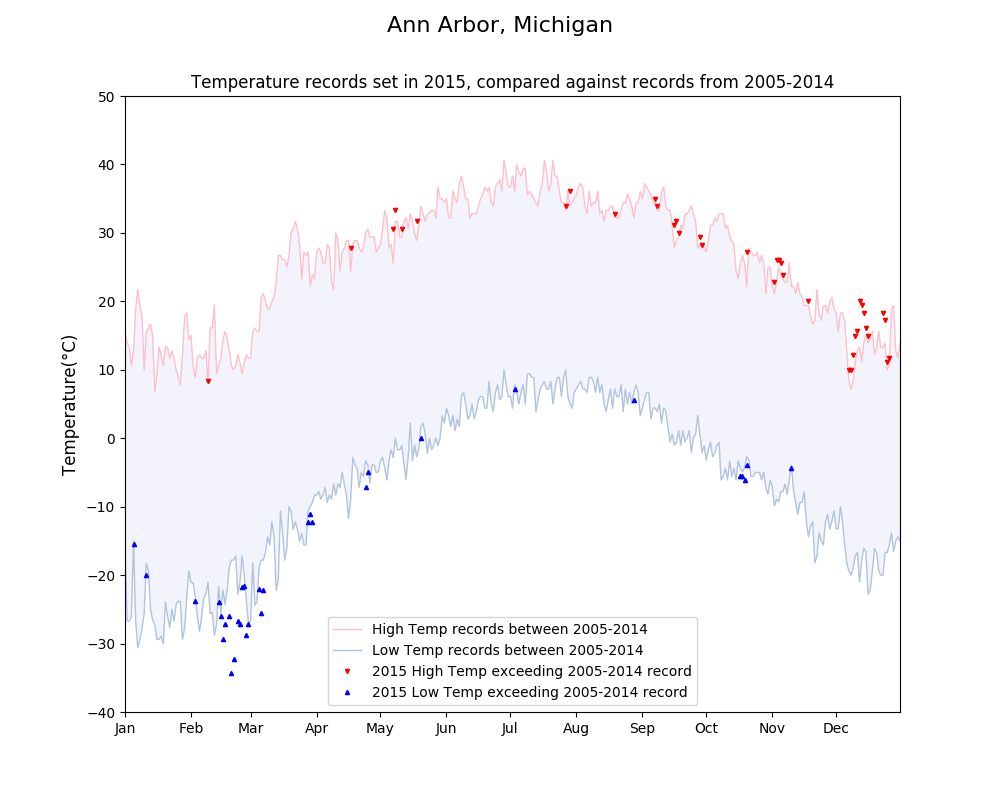

In [240]:
# Now we begin rough skeleton of the necessary graph
plt.figure(figsize=(10,8))
plt.plot(dt_index, record_highs, color='pink',linewidth=1)
plt.plot(dt_index, record_lows, color='lightsteelblue', linewidth=1)
plt.xlabel('', fontsize=12)
plt.ylabel('Temperature(°C)', fontsize=12)
plt.title("Temperature records set in 2015, compared against prior records from 2005-2014", fontsize=12)
plt.suptitle("Ann Arbor, Michigan", fontsize=16)
plt.gca().fill_between(dt_index, record_highs, record_lows, facecolor='lavender', alpha=0.45)


# Seems like pink instead of red is much easier on the eyes. 


In [241]:
# Further formating of graph before 2015 data is added.

ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-40,50])
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(dates.MonthLocator())

In [242]:
import numpy as np

# Including scatter plot for instances when 2015 temperatures break an existing record. 

max_2015 = df2[(df2.Element == 'TMAX') & (df2.Year >= 2015)]
max_2015 = max_2015.groupby(['Month_and_Day'])['Data_Value'].max() 

min_2015 = df2[(df2.Element == 'TMIN') & (df2.Year >= 2015)]
min_2015 = min_2015.groupby(['Month_and_Day'])['Data_Value'].min()

broken_max_temp = (max_2015 > record_highs).as_matrix()
broken_min_temp = (min_2015 < record_lows).as_matrix()

plt.plot(dt_index[broken_max_temp], max_2015[broken_max_temp].as_matrix(), 'rv',
         dt_index[broken_min_temp], min_2015[broken_min_temp].as_matrix(), 'b^', 
         ms=3, alpha=1.0)

In [245]:
# Finally, concluding the graph with an appropriate legend.

plt.legend(['High Temp records between 2005-2014', 'Low Temp records between 2005-2014',
           '2015 High Temp exceeding 2005-2014 record',
           '2015 Low Temp exceeding 2005-2014 record'], loc='lower center')